#  Television Viewers Segmentation

## Problem Statement 

To analyze the viewing patterns of television viewers by forming clusters with similar viewers in similar categories to enable us to understand the patterns in viewing channels, genres, duration etc.

## Explanation 

This project aims to discover television viewing patterns of viewers from large scale data collected from televisions. The data record information that when and which channel users have viewed. Users select programs to watch according to their preferences, but in some cases they habitually watch programs such as certain morning news or a series. Such daily habits may be difficult to find since they are not based on program's popularity or strong preferences but rather on unintentional customs. It is desirable to find such patterns because, for example,commercials that require viewers’ full attention are unlikely to be effective during the unintentional viewing. 

## Literature Review 

Television industry is experiencing a revolution with the rapid development of multimedia and network communication technologies. More abundant television contents and richer consumption experiences are provided to users. For example, they can time-shift their viewing, watch their favorite shows repeatedly, or switch to the Internet at anytime. The viewing habits of users are becoming more diverse, and thus it is more difficult to capture users’ viewing patterns. Television advertisers and service providers face challenges in attracting users in the incredibly competitive market. Efficient delivery of advertising and contents plays a key role in cutting cost and promoting competitiveness for them. In order to accomplish that,how to extract the target consumer group from the large community of users becomes an issue to be solved in television industry.

## Data 

The file tv-audience-dataset.csv contains the data relative to tv watching behaviour.
Source: http://recsys.deib.polimi.it/?page_id=76

Columns are:<br>
channel ID: channel id from 1 to 217.<br>
slot: hour inside the week relative to the start of the view, from 1 to 24*7 = 168.<br>
week: week from 1 to 19. Weeks 14 and 19 should not be used because they contain errors.<br>
genre ID: it is the id of the genre, form 1 to 8. Genre/subgenre mapping is attached below.<br>
subGenre ID: it is the id of the subgenre, from 1 to 114. Genre/subgenre mapping is attached below.<br>
user ID: it is the id of the user.<br>
program ID: it is the id of the program. The same program can occur multiple times (e.g. a tv show).<br>
event ID: it is the id of the particular instance of a program. It is unique, but it can span multiple slots.<br>
duration: duration of the view.<br>
	

## Deliverable 

1. Code including all processes from ingestion to output
2. Output i.e. cluster labels
3. Analysis Graphs
4. Output cluster graph


##  Evaluation 

Evaluation will be done based on silhouette score.The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.


In [1]:
# -*- coding: utf-8 -*-

#POC Code  :  TV VIEWERS SEGMENTATION  :  H2H DATA
#This code is for  POC  of  tv  viewers  segmentation which includes
#processes   starting   from   ingestion,   processing  and  results.
#It is meant for DEMO purposes only and not to be used in production.
#Copyright@ H2H DATA

#The entire prcess occurs in nine stages-
# 1. DATA INGESTION
# 2. DATA ANALYSIS 
# 3. DATA MUNGING
# 4. DATA EXPLORATION
# 5. DATA MODELING
# 6. HYPER-PARAMETERS OPTIMIZATION
# 7. PREDICTION
# 8. VISUAL ANALYSIS
# 9. RESULTS

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc
import pylab as pl
import warnings
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import randint as sp_randint
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

In [55]:
#CONSTANTS TO BE USED

PATH_TO_DATA = '../Data/tvaudiencedataset.csv'
NAME_COLUMNS = ['channel ID','slot','week','genre ID','subGenre ID','user ID','program ID','event ID','duration']
COLS_REMAINING = ['channel ID','slot','week','genre ID','subGenre ID','user ID','duration']
PARAM_GRID_KMEANS = {'n_clusters': sp_randint(7,10), 'max_iter':sp_randint(200,500)}
PARAM_GRID_HAC = {'n_clusters': sp_randint(7,10)}
THRESHOLD_OUTLIER = 6
N_ITER_RS = 50
N_COMPONENTS = 2
RUN_ANALYSIS = True

In [56]:

'''
  DATA INGESTION
-------------------

 Data is ingested in form of pandas dataframe

 Data  to be used   :   tvaudiencedataset.csv

 Data Information : 
	  Size : 1.1 GB
	  Features Information :
		channel ID: channel id from 1 to 217.
		slot: hour inside the week relative to the start  of 
			  the view, from 1 to 24*7 = 168.
		week: week from 1 to 19. Weeks 14 and 19 should  not 
			  be used because they contain errors.
		genre ID: it is the id of the genre, form 1 to 8. 
			  Genre/subgenre mapping is given in a csv  file
		subGenre ID: it is the id of the subgenre, from 1 to
					 114.
		user ID: it is the id of the user.
		program ID: it is  the  id of  the program. The same 
					program   can   occur   multiple   times 
					(e.g. a tv show).
		event ID: it is the id of the particular instance of
				  a program.  It  is unique, but it can span 
				  multiple slots.
		duration: duration of the view. 
'''

def Ingest_data():
	"""
	   Read the data in form of a pandas dataframe.Right now,
       we read  only  5000 records for Demo purposes but the 
       code  will  run exactly same   on  the entire dataset 
       although analysis may differ.

	   Returns:
	   -------
	   data : (M,9) pd.Dataframe

	"""
	data = pd.read_csv( PATH_TO_DATA,
						names= NAME_COLUMNS,
						nrows=5000)
	return data

df = Ingest_data()
print df

      channel ID  slot  week  genre ID  subGenre ID  user ID  program ID  event ID  duration
0             46    19     1         5           81        1      202344  50880093         5
1             46    20     1         5           81        1      202344  50880093        15
2             46    20     1         3           28        1      254329  50880094        41
3              1    19     1         6           11        2      109428  51094492        11
4              1    19     1         6           86        2        6017  51094494         5
5              1    19     1         5           98        2        6187  51094496        12
6              4    19     1         5           13        2      142037  51092594         1
7             46    19     1         5           81        2      202344  50880093         1
8             46    19     1         5           81        2      202344  50880093         5
9             46    20     1         5           81        2      2023

In [57]:

'''
  DATA ANALYSIS
-----------------

 Here,  data is  analysed and visualised to look for patterns 
 and   anamolies   using   graphs.  bar  graphs,   histograms,  
 scatter plots, etc. will be used

'''

def _scatter_plot(x, y):
	"""
	   Function to create a scatter plot of one column versus
	   another.

	   Parameters:
	   ----------
	   df : pd.Dataframe
			Input Data
	   x : string
		   Column name	   
	   y : string
		   Column name whose column to plot against 'x'

	   Returns:
	   --------
	   scatter plot between x and y.

	"""
	ax = df.plot(x=x, y=y, kind='scatter')
	ax.set_xlabel(x)
	ax.set_ylabel(y)
	ax.set_title(x+" versus "+y)
	plt.draw()
	plt.pause(0.01)
# 	raw_input("Press enter to continue")

def _histogram_plot(x, y):
	"""
	   Function  to  create  a  histogram  plot of one column 
	   versus another.

	   Parameters:
	   ----------
	   df : pd.Dataframe
			Input Data
	   x : string
		   Column name	   
	   y : string
		   Column name whose column to plot against 'x'

	   Returns:
	   --------
	   histogram plot between x and y.

	"""
	ax = df.plot(x=x, y=y, kind='hist')
	ax.set_xlabel(x)
	ax.set_ylabel(y)
	ax.set_title(x+" versus "+y)
	plt.draw()
	plt.pause(0.01)
# 	raw_input("Press enter to continue")

def _box_plot(x, y):
	"""
	   Function  to  create  a  box plot of one column versus 
	   another.

	   Parameters:
	   ----------
	   df : pd.Dataframe
			Input Data
	   x : string
		   Column name	   
	   y : string
		   Column name whose column to plot against 'x'

	   Returns:
	   --------
	   box plot between x and y.

	"""
	ax = df.plot(x=x, y=y, kind='box')
	ax.set_xlabel(x)
	ax.set_ylabel(y)
	ax.set_title(x+" versus "+y)
	plt.draw()
	plt.pause(0.01)
# 	raw_input("Press enter to continue")

def _bar_chart(x):
	"""
	   Function  to  create  a bar chart of one column versus 
	   another.

	   Parameters:
	   ----------
	   df : pd.Dataframe
			Input Data
	   x : string
		   Column name	   

	   Returns:
	   --------
	   bar chart.

	"""
	if x is not None:
		ax = df.groupby(x).count().plot(kind='bar')
		ax.set_xlabel(x)
		ax.set_title(x)
		plt.draw()
		plt.pause(0.01)
# 		raw_input("Press enter to continue")
	else:
		ax = df.plot(kind='bar')
		plt.draw()
		plt.pause(0.01)
# 		raw_input("Press enter to continue")



From small analysis, we take data of first 5000 records. We can see various patterns(which might vary differently as number of records are increased) such as -

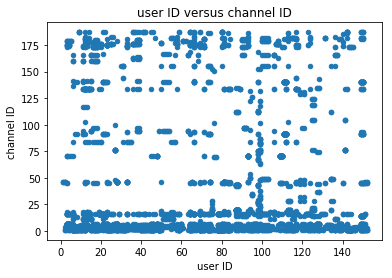

In [58]:
_scatter_plot('user ID','channel ID')

=> People usually prefer to see channels between 0 to 25, rarely between 50 to 165 and occasionally channels after 165.

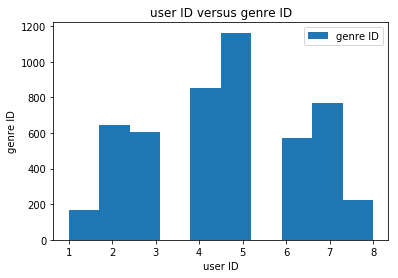

In [16]:
_histogram_plot('user ID','genre ID')

=> People watch genres 4 and 5 the most, 7 after that, 2,3,6 occsionally and rest of them rarely.

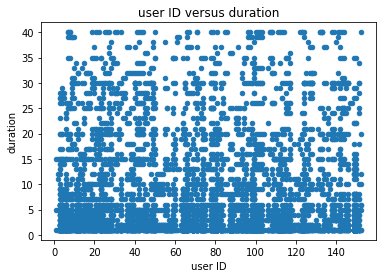

In [15]:
_scatter_plot('user ID','duration')

=> People usually watch television between 0 to 10 hours and with less frequency beyond 10 hours.

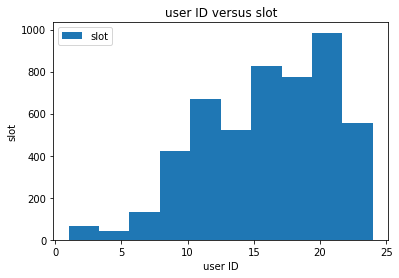

In [14]:
_histogram_plot('user ID','slot')

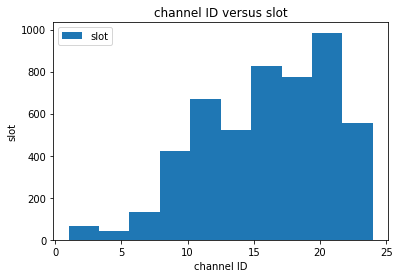

In [18]:
_histogram_plot('channel ID','slot')

=> The most used slot for watching are 20 and 21 and least are 0 to 5.

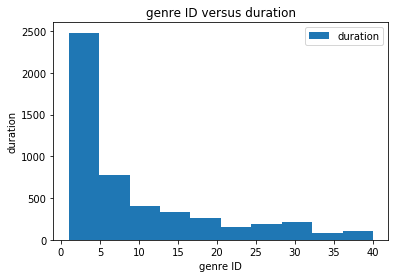

In [19]:
_histogram_plot('genre ID','duration')

=> Genres 0 to 5 are watched for maximum duration of time.

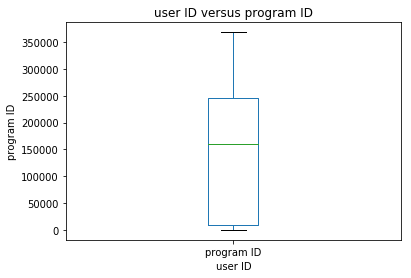

In [20]:
_box_plot('user ID','program ID')

=> People watch programs more within program range ID of 100000 and 200000

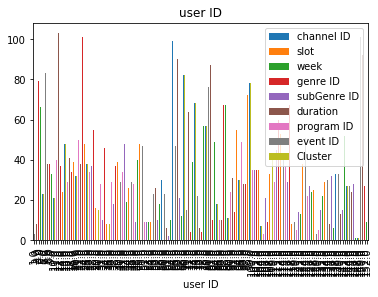

In [21]:
_bar_chart('user ID')

=> There are some users who watch very varied types of channels and genres and very few who watch very less range of programs.

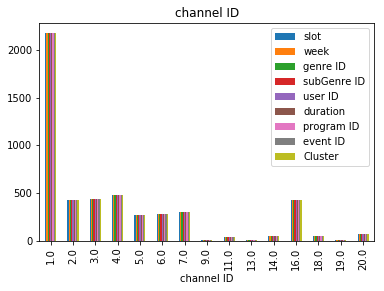

In [22]:
_bar_chart('channel ID')

=> Only few channels are being watched very extensively.

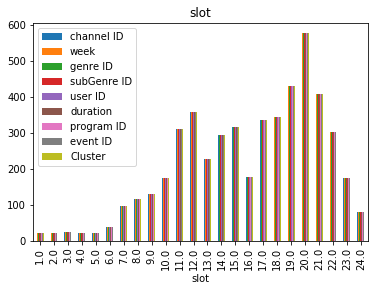

In [23]:
_bar_chart('slot')

=> Slots between 17 to 23 are the slots where users view most television and 1 to 6 slots where they view least television.

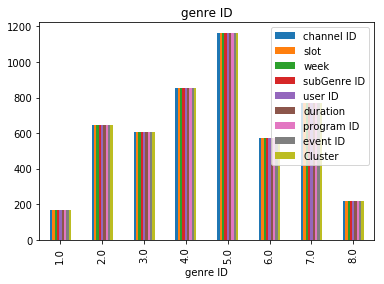

In [24]:
_bar_chart('genre ID')

=> Genre 5 is most liked by viewers and genre 1 the least. This shows that viewers watch television for entertainment purposes maximum times.

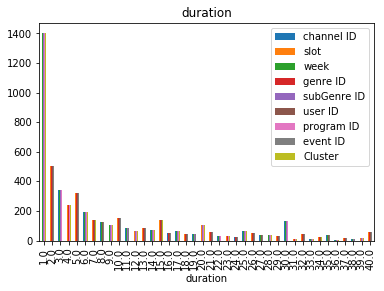

In [25]:
_bar_chart('duration')

=>  Duration for which viewers watch television is maximum for 1 hour and viewing proportion gradually decreases with increase in duration but there is s spike at duration 60 hours which means there are some viewers who watch television all most all the time!

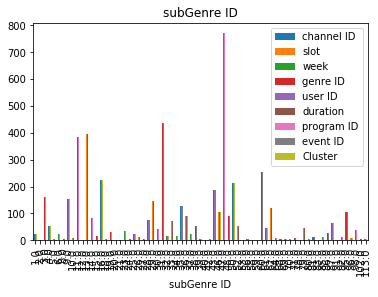

In [26]:
_bar_chart('subGenre ID')

=> From sub-genres, it can be seen that viewers like to watch undefined random things most of the time, then fiction the most, followed by entertainment shows and newscast. The least watched sub-genre are in sports such as cycling, swimming, basketball and also weather forecast, talk shows.

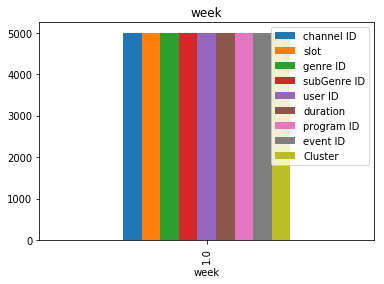

In [66]:
_bar_chart('week')

=> Here, as we take only 5000 records, we can see the data consists of only week 1. Nonetheless, if entire data is run, the ouput plot will be different.

As we see from above plots and there deduction, features are varied and less dependent on each other. 
To know a certain pattern of clustering, we can take different features two at a time and create clusters on those features to obtain a certain pattern in television viewing. 
For now, we cluster the entire data with all features together to get a certain pattern with all information included.

In [59]:
'''
 DATA MUNGING
---------------
 On the basis of information of data provided and on based on
 Data Analysis, data needs to be  rearranged, reorganised and 
 made  into a  proper structure to  make it  ready  for  Data
 modelling process.

'''

def Munging_data():
	"""
	   Rearrange and reorganise the  data  according  to  the 
	   problems needed to solve  so  the  modelling occurs on
	   proper datasets.

	   Returns:
	   --------
	   df : pd.Dataframe
			Dataset for further exploration

	"""
	df_ = df[~df['week'].isin([14,19])]
	return df_

df = Munging_data()
print df

      channel ID  slot  week  genre ID  subGenre ID  user ID  program ID  event ID  duration
0             46    19     1         5           81        1      202344  50880093         5
1             46    20     1         5           81        1      202344  50880093        15
2             46    20     1         3           28        1      254329  50880094        41
3              1    19     1         6           11        2      109428  51094492        11
4              1    19     1         6           86        2        6017  51094494         5
5              1    19     1         5           98        2        6187  51094496        12
6              4    19     1         5           13        2      142037  51092594         1
7             46    19     1         5           81        2      202344  50880093         1
8             46    19     1         5           81        2      202344  50880093         5
9             46    20     1         5           81        2      2023

In [60]:

'''
 DATA EXPLORATION
-------------------
 The data might contain outliers, missing values and  various
 other  things  which  might  cause  problems in modelling or
 might lead  to  wrong  results.  These  anamolies need to be 
 corrected  and  data  must be  cleaned before  passing it to
 modelling.

'''

def _outlier_detection(points):
	"""
	   Function  to  find  outliers  in  data and change them
	   to Nan values for further treatment.

	   Parameters:
	   ----------
	   points : (M,1) numpy array 
				A column of data

	   Returns:
	   --------
	   arr : (M,1) numpy array
			 A column having True False values 

	"""
	if len(points.shape) == 1:
		points = points[:,None]
	median = np.median(points, axis=0)
	diff = np.sum((points - median)**2, axis=-1)
	diff = np.sqrt(diff)
	med_abs_deviation = np.median(diff)
	modified_z_score = 0.6745 * diff / med_abs_deviation
	return modified_z_score > THRESHOLD_OUTLIER

def _missing_value_treatment(data):
	"""
	   Function  to  find  missing  values and fill them with 
	   mode of the column.

	   Parameters:
	   ----------
	   data : (M,N) numpy array 
			   data

	   Returns:
	   --------
	   arr : (M,N) numpy array
			 Data with filled missing values

	"""

	mode_values = sc.mode(data, nan_policy='omit')[0]
	inds = np.where(np.isnan(data))
	data[inds] = np.take(mode_values, inds[1])
	return data

def Exploration_data():
	"""
	   Function to apply data exploration techniques.

	   Returns:
	   --------
	   df_explored : (M,N) pandas DataFrame
					 Data 

	"""
	df_ = df.drop('program ID',axis=1).drop('event ID',axis=1).astype(float)
	arr = np.array(df_)
	outliers = np.apply_along_axis(_outlier_detection, 0, arr)
	arr[outliers] = np.nan
	arr = _missing_value_treatment(arr)
	df_explored = pd.concat([pd.DataFrame(arr, columns=COLS_REMAINING), df[['program ID', 'event ID']]], axis=1)
	return df_explored

df = Exploration_data()
print df

      channel ID  slot  week  genre ID  subGenre ID  user ID  duration  program ID  event ID
0           46.0  19.0   1.0       5.0         81.0      1.0       5.0      202344  50880093
1           46.0  20.0   1.0       5.0         81.0      1.0      15.0      202344  50880093
2           46.0  20.0   1.0       3.0         28.0      1.0      41.0      254329  50880094
3            1.0  19.0   1.0       6.0         11.0      2.0      11.0      109428  51094492
4            1.0  19.0   1.0       6.0         86.0      2.0       5.0        6017  51094494
5            1.0  19.0   1.0       5.0         98.0      2.0      12.0        6187  51094496
6            4.0  19.0   1.0       5.0         13.0      2.0       1.0      142037  51092594
7           46.0  19.0   1.0       5.0         81.0      2.0       1.0      202344  50880093
8           46.0  19.0   1.0       5.0         81.0      2.0       5.0      202344  50880093
9           46.0  20.0   1.0       5.0         81.0      2.0      15.0

In [61]:
'''
 DATA MODELING
----------------
 The data finally preprocessed and cleaned  is  now  used for 
 clustering and obtaining  the results. We  use K-Means model
 and HAC model for  prediction  and trace as our   evaluation
 metric 

'''

def _kmeans_model():
	"""
	   Function to initialize a KMEANS model.

	   Returns:
	   --------
	   clf : K-means model

	"""

	clf = KMeans()
	return clf

def _HAC_model():
	"""
	   Function to initialize a HAC model.

	   Returns:
	   --------
	   clf : HAC model

	"""

	clf = AgglomerativeClustering()
	return clf



In [62]:
'''
 HYPER-PARAMETERS OPTIMIZATION
--------------------
 The  hyperparameters  of a model need to be optimized to get 
 best possible score of prediction. For  this purpose, we use
 Random Grid Search.

'''

def _parameter_selection():
	"""
	   Function to select a random number of  hyperparameters
	   combinations   from  entire  grid  of  hyperparameters

	   Returns:
	   --------
	   rounded_list_kmeans : List of dictionaries
			 				 hyperparameters combinations for
			 				 Kmeans model
	   rounded_list_HAC : List of dictionaries
			 				 hyperparameters combinations for
			 				 HAC model

	"""

	param_list_kmeans = list(ParameterSampler(PARAM_GRID_KMEANS, n_iter=N_ITER_RS))
	rounded_list_kmeans = [dict((k, round(v, 6)) for (k, v) in d.items())
					for d in param_list_kmeans]
	rounded_list_kmeans = [dict(t) for t in set([tuple(d.items()) for d in rounded_list_kmeans])]

	param_list_HAC = list(ParameterSampler(PARAM_GRID_HAC, n_iter=N_ITER_RS))
	rounded_list_HAC = [dict((k, round(v, 6)) for (k, v) in d.items())
					for d in param_list_HAC]
	rounded_list_HAC = [dict(t) for t in set([tuple(d.items()) for d in rounded_list_HAC])]

	return rounded_list_kmeans,rounded_list_HAC

def _random_search(X, clf, param_distributions):
	"""
	   Function to fit the model by selecting params from the
	   selected parameters combinations and saving the metric 
	   value.

	   Parameters:
	   ----------
	   X : (M,N) numpy array 
			   data
	   clf : model object 
			 initialized model 
	   param_distributions : List of dictionaries
	   						 paramters combinations	 

	   Returns:
	   --------
	   best : tuple
			  best metric value and corresponding parameters

	"""

	out = (0,0)
	for params in param_distributions:
		params = {k:int(v) for k,v in params.iteritems()}
		clf.set_params(**params)
		cluster_labels = clf.fit_predict(X)
		metric_value = silhouette_score(X,cluster_labels)
		if metric_value > out[0]:
			out = (metric_value,params)

	best = out
	return best

def Optimization_model():
	"""
	   Function to optimize  the model and select best params
	   combination from grid. It runs  both  KMEANS  and  HAC

	   Returns:
	   --------
	   best_model, name : tuple, string
			  			  best  metric  value, parameters and
			  			  model name

	"""
	param_kmeans, param_HAC = _parameter_selection()
	arr = np.array(df.astype(int))
	
	clf_kmeans = _kmeans_model()
	best_kmeans = _random_search(arr, clf_kmeans, param_kmeans)

	clf_HAC = _HAC_model()
	best_HAC = _random_search(arr, clf_HAC, param_HAC)

	if best_HAC[0] > best_kmeans[0]:
		return best_HAC, 'HAC'

	return best_kmeans, 'KMEANS'

(score, best_params), model = Optimization_model()

print score,'=== Best Score from Random Search'
print model,'=== Model which gave the best score'
print best_params,'=== Paramters of the model'


0.6851556221277687 === Best Score from Random Search
KMEANS === Model which gave the best score
{'max_iter': 454, 'n_clusters': 7} === Paramters of the model


In [63]:

'''
 PREDICTION
-------------
 Here, we finally predict the  cluster labels  from our  best
 parameters model obtained from optimization.

'''

def Prediction():
	"""
	   Function to fit the model by best parameters  obtained
	   and predict the cluster labels.

	   Returns:
	   --------
	   df_ : pandas Dataframe
			 data with predicted column

	"""	
	if model == 'HAC':
		clf = _HAC_model()
		clf.set_params(**best_params)
		labels = clf.fit_predict(np.array(df.astype(int)))
		df_ = pd.concat([df,pd.DataFrame(labels,columns=['Cluster'])], axis=1)
		return df_

	clf = _kmeans_model()
	clf.set_params(**best_params)
	labels = clf.fit_predict(np.array(df.astype(int)))
	df_ = pd.concat([df,pd.DataFrame(labels,columns=['Cluster'])], axis=1)
	return df_

df = Prediction()
print df


      channel ID  slot  week  genre ID  subGenre ID  user ID  duration  program ID  event ID  Cluster
0           46.0  19.0   1.0       5.0         81.0      1.0       5.0      202344  50880093        4
1           46.0  20.0   1.0       5.0         81.0      1.0      15.0      202344  50880093        4
2           46.0  20.0   1.0       3.0         28.0      1.0      41.0      254329  50880094        4
3            1.0  19.0   1.0       6.0         11.0      2.0      11.0      109428  51094492        0
4            1.0  19.0   1.0       6.0         86.0      2.0       5.0        6017  51094494        0
5            1.0  19.0   1.0       5.0         98.0      2.0      12.0        6187  51094496        0
6            4.0  19.0   1.0       5.0         13.0      2.0       1.0      142037  51092594        5
7           46.0  19.0   1.0       5.0         81.0      2.0       1.0      202344  50880093        4
8           46.0  19.0   1.0       5.0         81.0      2.0       5.0      202344

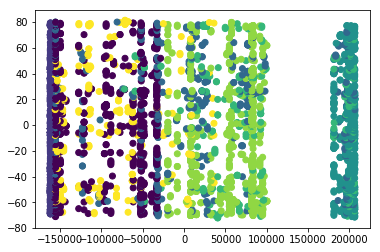

In [64]:
'''
 VISUAL ANALYSIS
------------------
 After predicting the clusters in data,  we now visualize the 
 clusters  using  a  scatter  plot. To plot, we will need  to
 apply  the  dimensionality  reduction  on  data  to  get two
 components from data.

'''
def Visual_analysis():
	"""
	   Function to analyze the clusters  formed  visually  by
	   plotting scatter plot. PCA will  be  performed  on the 
	   data   to  get  two  components  from   all   Features

	   Returns:
	   --------
	   scatter plot

	"""

	arr = df.drop('Cluster',axis=1).drop('event ID',axis=1)
	pca = PCA(n_components=N_COMPONENTS).fit(arr)
	pca_2d = pca.transform(arr)
	pl.figure(model+' with '+str(best_params['n_clusters'])+' clusters with a score '+str(score))
	pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=df['Cluster'])
	pl.draw()
	pl.pause(0.01)
    
Visual_analysis()


As we can see from the scatter plot, the clusters are well formed according to the data space. This leads to conclusion that our model performed good and the clusters can be used for further business purposes.

In [67]:
'''
 RESULTS
---------
 Get the predicted labels for records.
 K-means outperformed HAC and scored a best silhouette score of 0.68 with 7 clusters.
'''

print df

      channel ID  slot  week  genre ID  subGenre ID  user ID  duration  program ID  event ID  Cluster
0           46.0  19.0   1.0       5.0         81.0      1.0       5.0      202344  50880093        4
1           46.0  20.0   1.0       5.0         81.0      1.0      15.0      202344  50880093        4
2           46.0  20.0   1.0       3.0         28.0      1.0      41.0      254329  50880094        4
3            1.0  19.0   1.0       6.0         11.0      2.0      11.0      109428  51094492        0
4            1.0  19.0   1.0       6.0         86.0      2.0       5.0        6017  51094494        0
5            1.0  19.0   1.0       5.0         98.0      2.0      12.0        6187  51094496        0
6            4.0  19.0   1.0       5.0         13.0      2.0       1.0      142037  51092594        5
7           46.0  19.0   1.0       5.0         81.0      2.0       1.0      202344  50880093        4
8           46.0  19.0   1.0       5.0         81.0      2.0       5.0      202344